In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.7746 - loss: 0.6233 - val_accuracy: 0.8764 - val_loss: 0.3461
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8870 - loss: 0.3125 - val_accuracy: 0.8916 - val_loss: 0.2957
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9034 - loss: 0.2597 - val_accuracy: 0.8971 - val_loss: 0.2776


Test accuracy: 89.71 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


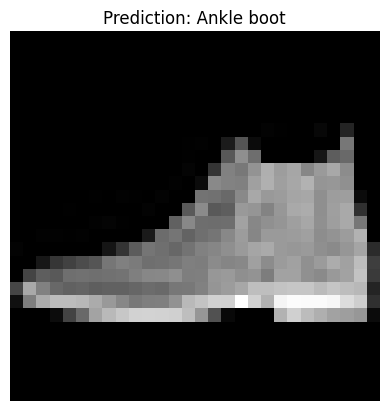

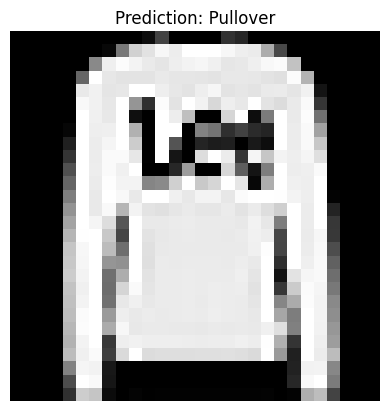

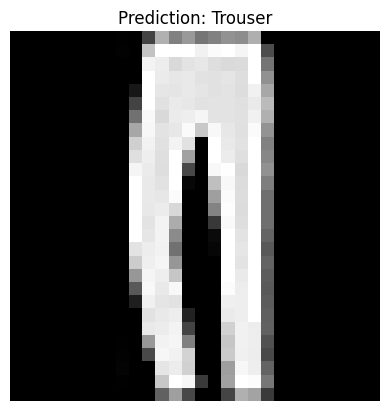

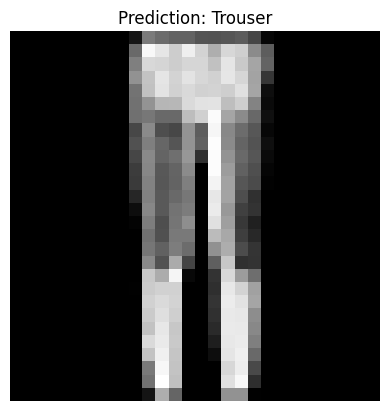

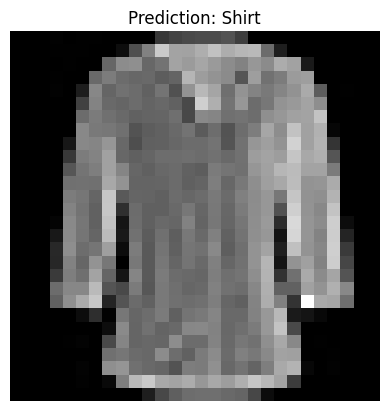


 Upload your own doodle to test


Saving Screenshot 2025-09-15 220742.png to Screenshot 2025-09-15 220742 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


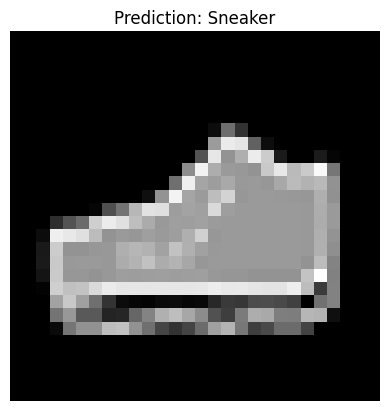

In [5]:
#loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#our labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


#preprocessing below this
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#above code adds the label

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#to compile and train

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", round(test_acc*100, 2), "%")

predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Prediction: {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
    plt.show()
print("\n Upload your own doodle to test")
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(filename).convert('L')
    img = img.resize((28,28))
    img = np.array(img)
    img = 255 - img
    img = img / 255.0
    img = img.reshape(1,28,28,1)

    prediction = model.predict(img)
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.title(f"Prediction: {class_names[np.argmax(prediction)]}")
    plt.axis("off")
    plt.show()